In [1]:
import pandas as pd

Load the dataset.

In [2]:
df = pd.read_csv('nutrition_data.tsv', sep='\t')

Examine the data.

In [3]:
print(df.head())

             product_name          brands     brands_tags countries  \
0                 Peanuts  Torn & Glasser    torn-glasser        US   
1  Organic Salted Nut Mix       Grizzlies       grizzlies        US   
2          Organic Muesli  Daddy's Muesli  daddy-s-muesli        US   
3           Zen Party Mix        Sunridge        sunridge        US   
4    Cinnamon Nut Granola       Grizzlies       grizzlies        US   

     countries_tags   countries_en  \
0  en:united-states  United States   
1  en:united-states  United States   
2  en:united-states  United States   
3  en:united-states  United States   
4  en:united-states  United States   

                                    ingredients_text     serving_size  \
0  Peanuts, wheat flour, sugar, rice flour, tapio...  28 g (0.25 cup)   
1  Organic hazelnuts, organic cashews, organic wa...  28 g (0.25 cup)   
2  Org oats, org hemp granola (org oats, evaporat...   64 g (0.5 cup)   
3  Roasted peanuts (peanuts, peanut or canola oil...

Let's create some labels that our healthy food classifier can use to classify the other foods. We'll make a list of foods that we know are healthy with high confidence.

In [13]:
# from https://www.womansday.com/food-recipes/food-drinks/g2211/best-superfoods/
super_foods = ['Cherries', 'Swiss Chard', 'Watermelon', 'Eggs', 'Tomatoes', 'Prunes', 'Walnuts', 
               'Brussels Sprouts', 'Acai', 'Apples', 'Bok Choy', 'Steel-Cut Oats', 'Salmon', 'Avocados', 
               'Pumpkin', 'Spinach', 'Cauliflower', 'Scallops', 'Collard greens', 'Olives', 'Brown Rice', 
               'Oysters', 'Edamame', 'Strawberries', 'Lentils', 'Kiwi', 'Bran flakes', 'Sunflower Seeds',
               'Black beans', 'Asparagus', 'Bananas', 'Broccoli Sprouts', 'Potatoes', 'Flaxseed', 
               'Sweet Potatoes', 'Greek Yogurt', 'Wheat Germ', 'Cherry Juice', 'Whole Wheat English Muffins', 
               'Tea', 'Blackberries', 'Soy Milk', 'Peanut Butter', 'Mustard Freens', 'Brazil Nuts', 'Grapes', 
               'Canola Oil', 'Blueberries', 'Oranges', 'Watercress', 'Barley', 'Turkey Breast', 
               'Shiitake Mushrooms']

# from https://guidedoc.com/best-superfoods-list
super_foods = super_foods + ['Papaya', 'Brazil Nuts', 'Spinach', 'Seaweed', 'Tomatoes', 'Broccoli', 'Black Raspberries', 
                   'Walnuts', 'Garlic', 'Black Pepper', 'Lentils', 'Fish Oil', 'Ginger', 'Peppermint', 
                   'Pineapple', 'Sauerkraut', 'Water', 'Tart Cherry Juice', 'Spirulina', 'Parsley', 'Wheat Grass',
                   'Dark Chocolate', 'Extra-Virgin Olive Oil', 'Grapefruit', 'Oatmeal', 'Wild Salmon', 'Hemp Seed',
                   'Arugula', 'Avocado', 'Blueberries', 'Almond Milk', 'Coconut Oil', 'Carrots', 'Kale', 
                   'Dried Mulberries', 'Cilantro', 'Brussels Sprouts', 'Apples', 'Buckwheat Pasta', 'Goji Berries',
                   'Pomegranates', 'Yogurt', 'Kiwi', 'Onion', 'Mango', 'Green Tea', 'Honey', 'Oranges', 'Sweet Potato',
                   'Turmeric']

Let's remove any duplicate entries we have in the list of super foods.

In [14]:
#def remove_duplicates(x):
#    return list(dict.fromkeys(dict(x))

#super_foods = remove_duplicates(super_foods)

#print(super_foods)

Now let's make a list of foods that we know are unhealthy with high confidence.

In [15]:
# from https://www.eatthis.com/unhealthiest-foods-on-the-planet/
bad_foods = ['Coffee Creamer', 'Bleached White Flour Bread', 'Fruit Juice', 'Diet Sodas', 'Fried Chicken', 
               'Fried Calamari', 'Pork Rinds', 'Chicken-fried Steak', 'Bacon', 'Sausage', 'Frosted Flakes', 
              'Fruity Pebbles', 'White Sugar', 'Frosting', 'Pancake Syrup', 'High Fructose Corn Syrup', 
              'Charred Meats', 'Fast Food', 'Energy Drinks', 'Ready-To-Bake Pie Crust', 'Arsenic', 'Breakfast Biscuits',
              'BBQ Sauce', 'Diet Ice Cream', 'Sports Drinks', 'Gatorade', 'Cheesecake', 'Tiramisu', 'Margarine', 
              'Meatloaf', 'Taco Bowls', 'Frozen Pizza', 'Fettuccine Alfredo', 'Belgian Waffles', 'Onion Rings', 
              'Mayonnaise', 'Nachos', 'Fish and Chips', 'Mozzarella Sticks', 'French Toast', 'Croissants', 'Soybean Oil', 
              'Canned Soup', 'Campbell\'s Homestyle Chicken Noodle Soup', 'Bouillon Cubes', 'Muffins', 'Otis Spunkmeyer Muffins',
              'Boxed Macaroni and Cheese', 'Kraft\'s Three Cheese Mac & Cheese', 'Frozen Pies', 'Hot Dogs', 'Deli Meats', 
              'Instant Oatmeal Packets', 'Candy', 'M&Ms', 'Boxed Cake Mixes', 'Bottled Water', 'Dried Fruit Snacks', 
              'American Cheese', 'Wheat Bread', 'Artificial Chocolate', 'Pickles', 'Chewing Gum', 'Reduced-Fat Peanut Butter',
              'Veggie Burgers', 'Instant Oatmeal Cups', 'Bottled Lemonade', 'Sprinkles', 'Maraschino Cherries', 'Fruit Yogurt',
              'Bottled Coffee', 'Water Enhancers', 'Frozen Fish', 'Mrs. Paul\'s Beer Battered Fillets', 'Granola Bars', 
              'Meal Replacement Shakes', 'Light Butter Substitutes', 'Salad Dressing', 'Ken\'s Steak House Fat Free Sun-Dried Tomato Vinaigrette',
              'Marie\'s Creamy Italian Garlic', 'Fruit Cocktail', 'Protein Bars', 'Flavored Rice', 'Uncle Ben\'s Cheddar Broccoli rice', 
               'Sugar-Free Jam', 'Sugar-Free Chocolate', 'Refried Beans', 'Fast Food Chicken Nuggets', 'Velveeta', 
              'Tostitos Salsa Con Queso', 'Cheez Whiz', 'Nissin Cup Noodles', 'Milano Cookies', 'Totino\'s Pizza Rolls', 
               'Toaster Strudel', 'Hershey\'s Gold Bar', 'Mott\'s Applesauce', 'Nilla Wafers', 'Hot Pockets', 'Slim Jim', 'Pop-Tarts',
              'Chef Boyardee Spaghetti & Meatballs', 'Doritos', 'Cheetos', 'Oreos', 'Chips Ahoy! Cookies', 'Sugar-Free Jell-O', 
              'Matador Original Beef Jerky', 'Cool Whip', 'Splenda']

Now we need to make a training dataset using the foods we have listed, with labels 0 and 1 corresponding to healthy and unhealthy.

In [16]:
print(super_foods)

['Cherries', 'Swiss Chard', 'Watermelon', 'Eggs', 'Tomatoes', 'Prunes', 'Walnuts', 'Brussels Sprouts', 'Acai', 'Apples', 'Bok Choy', 'Steel-Cut Oats', 'Salmon', 'Avocados', 'Pumpkin', 'Spinach', 'Cauliflower', 'Scallops', 'Collard greens', 'Olives', 'Brown Rice', 'Oysters', 'Edamame', 'Strawberries', 'Lentils', 'Kiwi', 'Bran flakes', 'Sunflower Seeds', 'Black beans', 'Asparagus', 'Bananas', 'Broccoli Sprouts', 'Potatoes', 'Flaxseed', 'Sweet Potatoes', 'Greek Yogurt', 'Wheat Germ', 'Cherry Juice', 'Whole Wheat English Muffins', 'Tea', 'Blackberries', 'Soy Milk', 'Peanut Butter', 'Mustard Freens', 'Brazil Nuts', 'Grapes', 'Canola Oil', 'Blueberries', 'Oranges', 'Watercress', 'Barley', 'Turkey Breast', 'Shiitake Mushrooms', 'Papaya', 'Brazil Nuts', 'Spinach', 'Seaweed', 'Tomatoes', 'Broccoli', 'Black Raspberries', 'Walnuts', 'Garlic', 'Black Pepper', 'Lentils', 'Fish Oil', 'Ginger', 'Peppermint', 'Pineapple', 'Sauerkraut', 'Water', 'Tart Cherry Juice', 'Spirulina', 'Parsley', 'Wheat Grass

In [17]:
training_list = super_foods + bad_foods
in_training_data = lambda row: 1 if row['product_name'] in training_list else 0
df['in_training_data'] = df.apply(in_training_data, axis=1)

In [18]:
df_training_data = df[df['in_training_data'] == 1]
print(df_training_data)

         product_name                         brands  \
216     Peanut Butter                   Trader Joe's   
217     Peanut Butter                   Trader Joe's   
218     Peanut Butter                   Trader Joe's   
338           Lentils                  Marconi Brand   
349          Soy Milk  Sahm In International Company   
...               ...                            ...   
156069        Muffins                Mikey's Muffins   
156389     Mayonnaise                      Jeanbaton   
156876   Greek Yogurt                  The Epic Seed   
156919       Scallops                   Pacific Surt   
157115  Peanut Butter              Pic's Really Good   

                          brands_tags countries    countries_tags  \
216                      trader-joe-s        US  en:united-states   
217                      trader-joe-s        US  en:united-states   
218                      trader-joe-s        US  en:united-states   
338                     marconi-brand        US  en

Now let's give each food in this list a label of 1 or 0 for 'healthy' or 'unhealthy'.

In [19]:
print(super_foods)

['Cherries', 'Swiss Chard', 'Watermelon', 'Eggs', 'Tomatoes', 'Prunes', 'Walnuts', 'Brussels Sprouts', 'Acai', 'Apples', 'Bok Choy', 'Steel-Cut Oats', 'Salmon', 'Avocados', 'Pumpkin', 'Spinach', 'Cauliflower', 'Scallops', 'Collard greens', 'Olives', 'Brown Rice', 'Oysters', 'Edamame', 'Strawberries', 'Lentils', 'Kiwi', 'Bran flakes', 'Sunflower Seeds', 'Black beans', 'Asparagus', 'Bananas', 'Broccoli Sprouts', 'Potatoes', 'Flaxseed', 'Sweet Potatoes', 'Greek Yogurt', 'Wheat Germ', 'Cherry Juice', 'Whole Wheat English Muffins', 'Tea', 'Blackberries', 'Soy Milk', 'Peanut Butter', 'Mustard Freens', 'Brazil Nuts', 'Grapes', 'Canola Oil', 'Blueberries', 'Oranges', 'Watercress', 'Barley', 'Turkey Breast', 'Shiitake Mushrooms', 'Papaya', 'Brazil Nuts', 'Spinach', 'Seaweed', 'Tomatoes', 'Broccoli', 'Black Raspberries', 'Walnuts', 'Garlic', 'Black Pepper', 'Lentils', 'Fish Oil', 'Ginger', 'Peppermint', 'Pineapple', 'Sauerkraut', 'Water', 'Tart Cherry Juice', 'Spirulina', 'Parsley', 'Wheat Grass

In [20]:
healthy_label = lambda row: 1 if (row['product_name'] in super_foods) else 0
df_training_data['healthy_label'] = df_training_data.apply(healthy_label, axis=1)
print(df_training_data.head())

      product_name                         brands  \
216  Peanut Butter                   Trader Joe's   
217  Peanut Butter                   Trader Joe's   
218  Peanut Butter                   Trader Joe's   
338        Lentils                  Marconi Brand   
349       Soy Milk  Sahm In International Company   

                       brands_tags countries    countries_tags   countries_en  \
216                   trader-joe-s        US  en:united-states  United States   
217                   trader-joe-s        US  en:united-states  United States   
218                   trader-joe-s        US  en:united-states  United States   
338                  marconi-brand        US  en:united-states  United States   
349  sahm-in-international-company        US  en:united-states  United States   

                                      ingredients_text      serving_size  \
216                               Dry roasted peanuts.     32 g (2 Tbsp)   
217                         Dry roasted pe

/home/jared/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We are now ready to build and train the classifier. We'll use a logistic regression classifier. We will consider every numeric column.

In [21]:
df_training_data.info()
print(df_training_data.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 216 to 157115
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   product_name                             1218 non-null   object 
 1   brands                                   1218 non-null   object 
 2   brands_tags                              1218 non-null   object 
 3   countries                                1218 non-null   object 
 4   countries_tags                           1218 non-null   object 
 5   countries_en                             1218 non-null   object 
 6   ingredients_text                         1218 non-null   object 
 7   serving_size                             1218 non-null   object 
 8   additives_n                              1218 non-null   float64
 9   additives                                1218 non-null   object 
 10  ingredients_from_palm_oil_n              121

In [22]:
relevant_columns = ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'healthy_label']
training_data = df_training_data[relevant_columns]
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 216 to 157115
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   additives_n                              1218 non-null   float64
 1   ingredients_from_palm_oil_n              1218 non-null   float64
 2   ingredients_that_may_be_from_palm_oil_n  1218 non-null   float64
 3   energy_100g                              1218 non-null   float64
 4   fat_100g                                 1218 non-null   float64
 5   saturated-fat_100g                       1218 non-null   float64
 6   carbohydrates_100g                       1218 non-null   float64
 7   sugars_100g                              1218 non-null   float64
 8   fiber_100g                               1218 non-null   float64
 9   proteins_100g                            1218 non-null   float64
 10  salt_100g                                121

Now we should explore the training data to make sure there are no unusual features like outliers that could screw up the model. First we will use value_counts to print what values show up in each column.

In [23]:
for column in relevant_columns:
    print(column)
    print(training_data[column].value_counts())

additives_n
0.0     570
1.0     180
2.0     167
3.0     113
4.0      74
5.0      50
6.0      38
7.0       9
9.0       6
8.0       5
10.0      3
11.0      1
13.0      1
14.0      1
Name: additives_n, dtype: int64
ingredients_from_palm_oil_n
0.0    1218
Name: ingredients_from_palm_oil_n, dtype: int64
ingredients_that_may_be_from_palm_oil_n
0.0    1195
1.0      22
2.0       1
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64
energy_100g
71.0      41
2092.0    30
209.0     28
2987.0    24
222.0     22
          ..
950.0      1
473.0      1
1946.0     1
862.0      1
2017.0     1
Name: energy_100g, Length: 359, dtype: int64
fat_100g
0.00      381
50.00      33
100.00     28
0.71       25
78.57      23
         ... 
81.00       1
20.75       1
26.67       1
1.14        1
1.18        1
Name: fat_100g, Length: 341, dtype: int64
saturated-fat_100g
0.00     580
7.14      28
6.25      22
6.67      19
14.29     18
        ... 
9.73       1
2.38       1
10.99      1
92.86      1
17.78     

It looks like 'ingredients_from_palm_oil_n' is always 0, and 'ingredients_that_may_be_from_palm_oil_n' is always 0 except for one value. We can drop those columns.

In [26]:
#training_data.drop(labels=['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'], axis=1, inplace=True)
relevant_columns = ['additives_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'healthy_label']
training_data = df_training_data[relevant_columns]
#training_data.info()

We'll now plot the distributions and some scatter plots to check for outliers and correlations between variables.

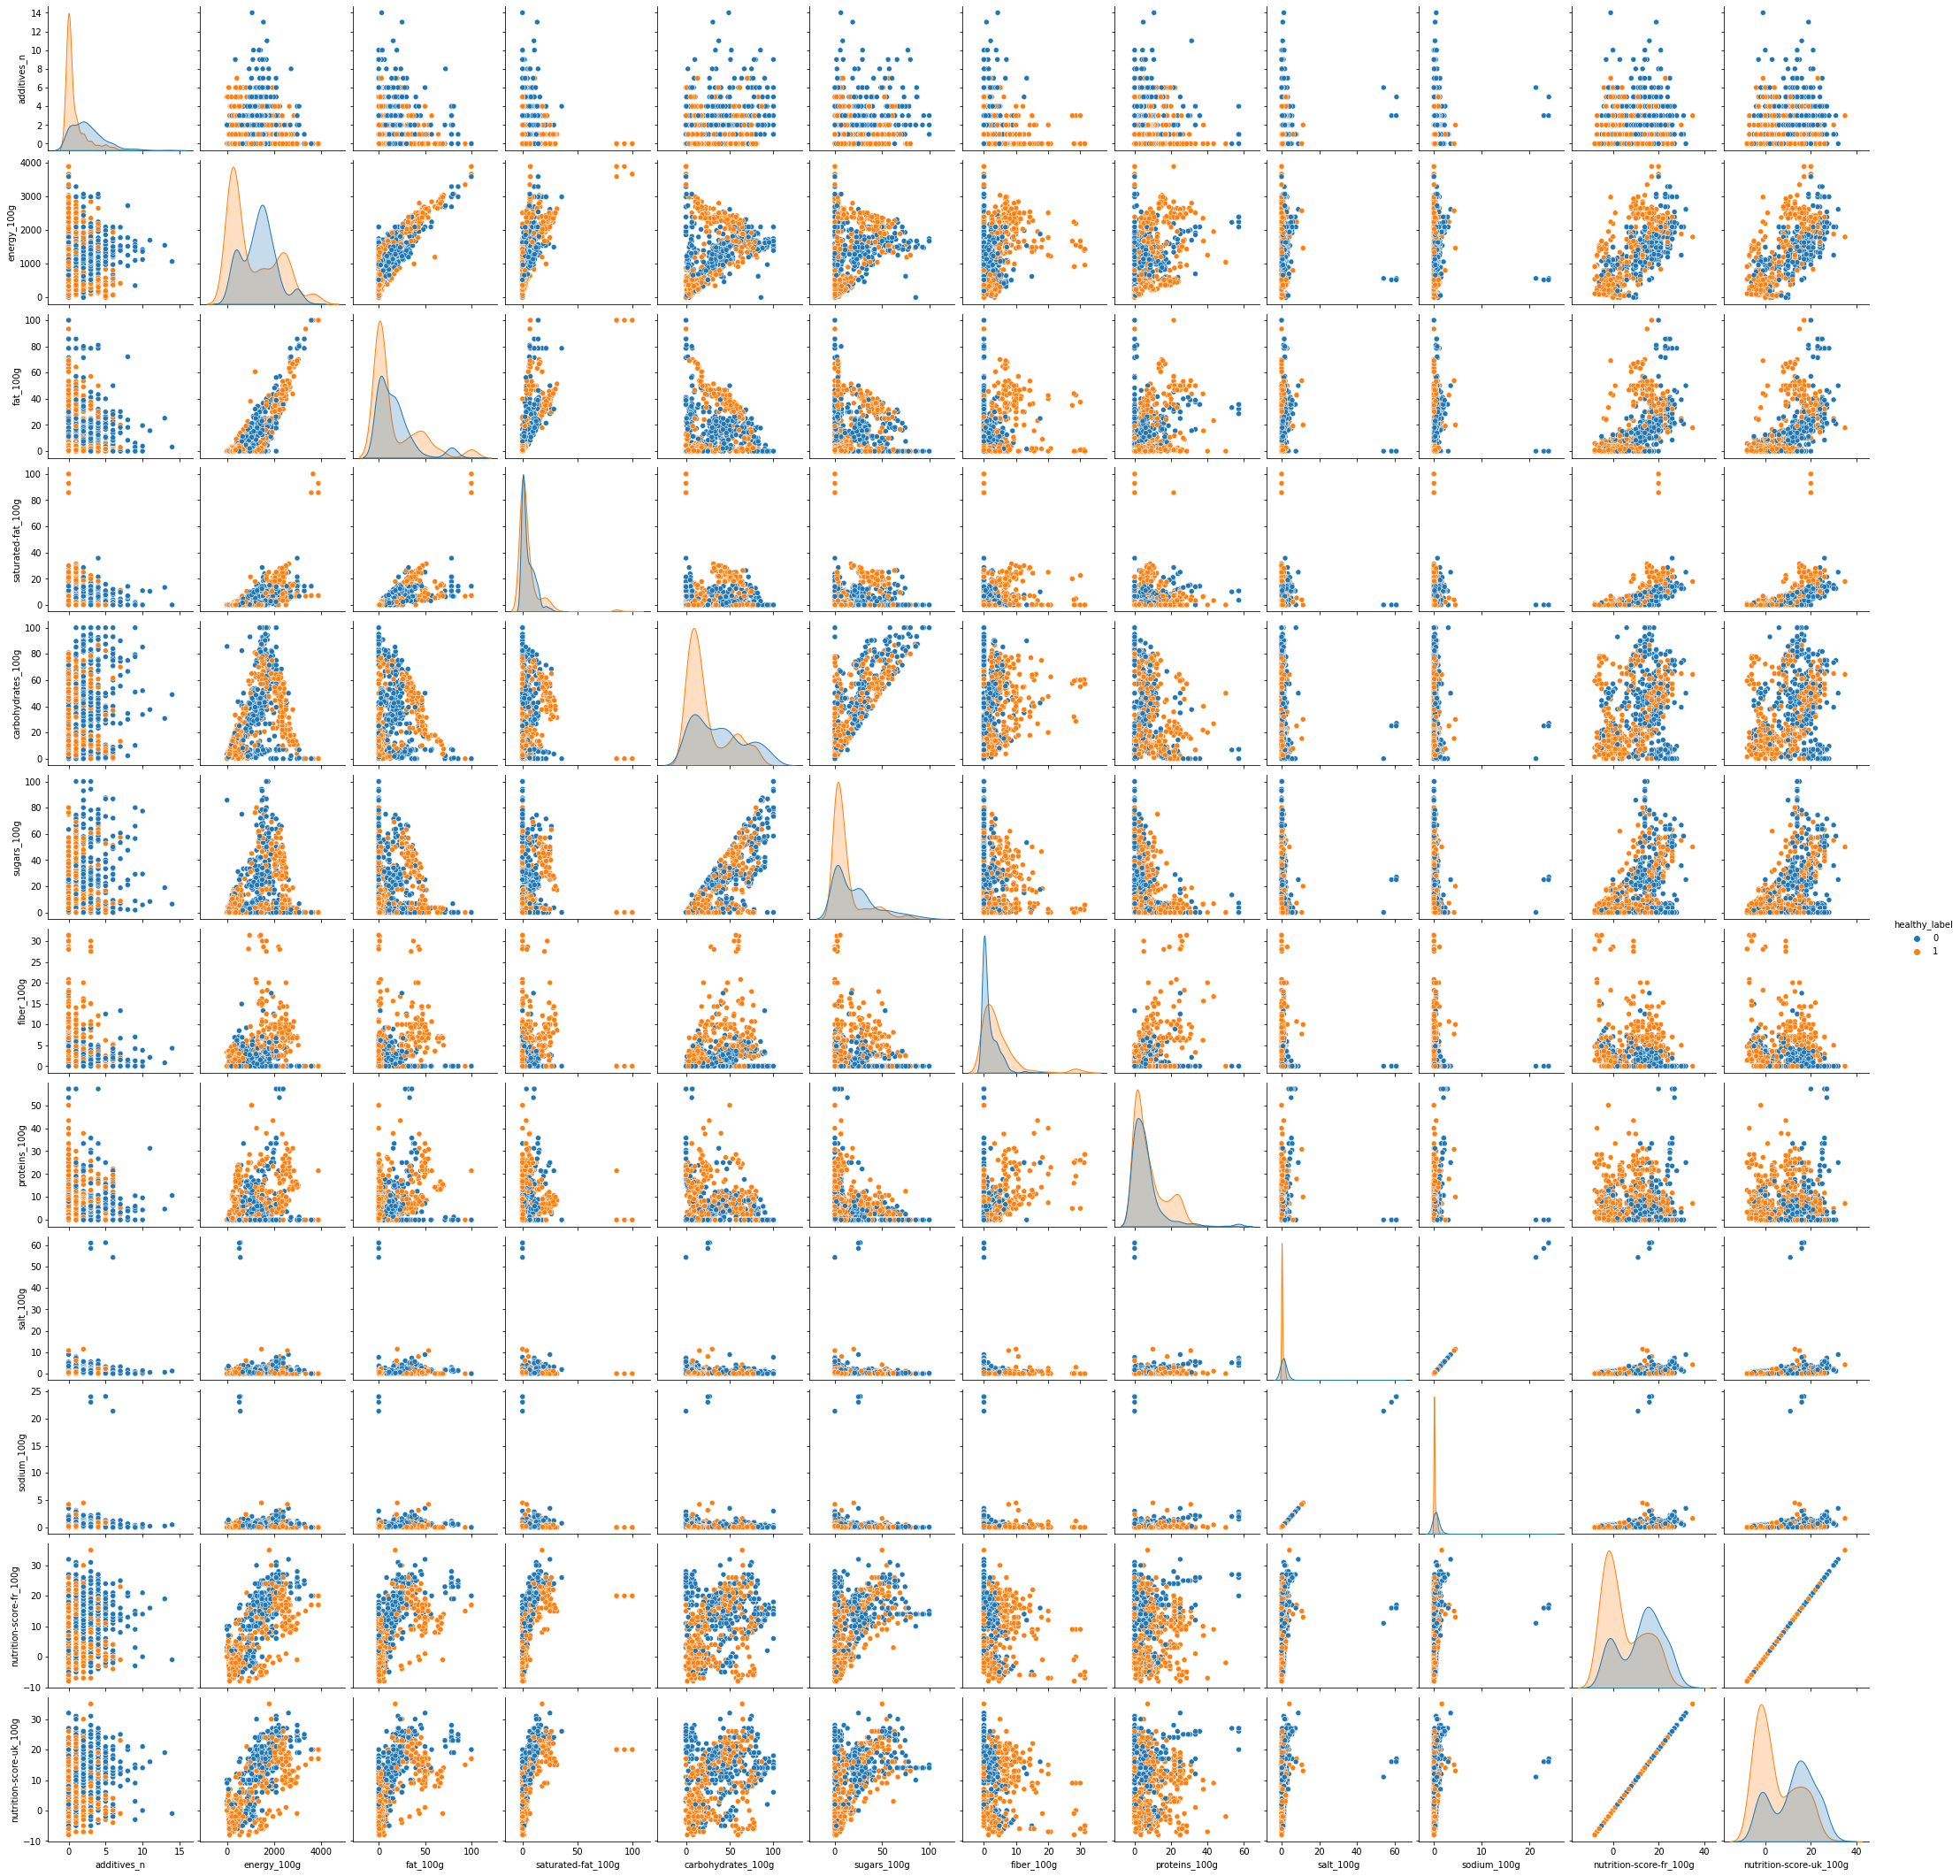

In [27]:
import seaborn as sns
sns.pairplot(training_data, hue="healthy_label")

I notice a few things here. First of all, 'nutrition-score-fr_100g' and 'nutrition-score-uk_100g' are perfectly correlated, so I should remove one of them. Secondly, 'salt_100g' and 'sodium_100g' are also perfectly correlated, as I might have guessed, so I should remove one of those. Thirdly, there are outliers in sodium/salt above 20/40, and some outliers in 'saturated-fat_100g' above 50. I will simply remove these outliers from my training dataset for now. Lastly, energy and fat seem to be correlated. I know that the energy comes from fat and carbs, and since fat and carbs are both included in the data already, I can probably remove energy.

In [35]:
relevant_columns = ['additives_n', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'sodium_100g', 'nutrition-score-uk_100g', 'healthy_label']
df_temp = df_training_data[relevant_columns]
training_data = df_temp[(df_temp['sodium_100g'] < 20) & (df_temp['saturated-fat_100g'] < 50)]

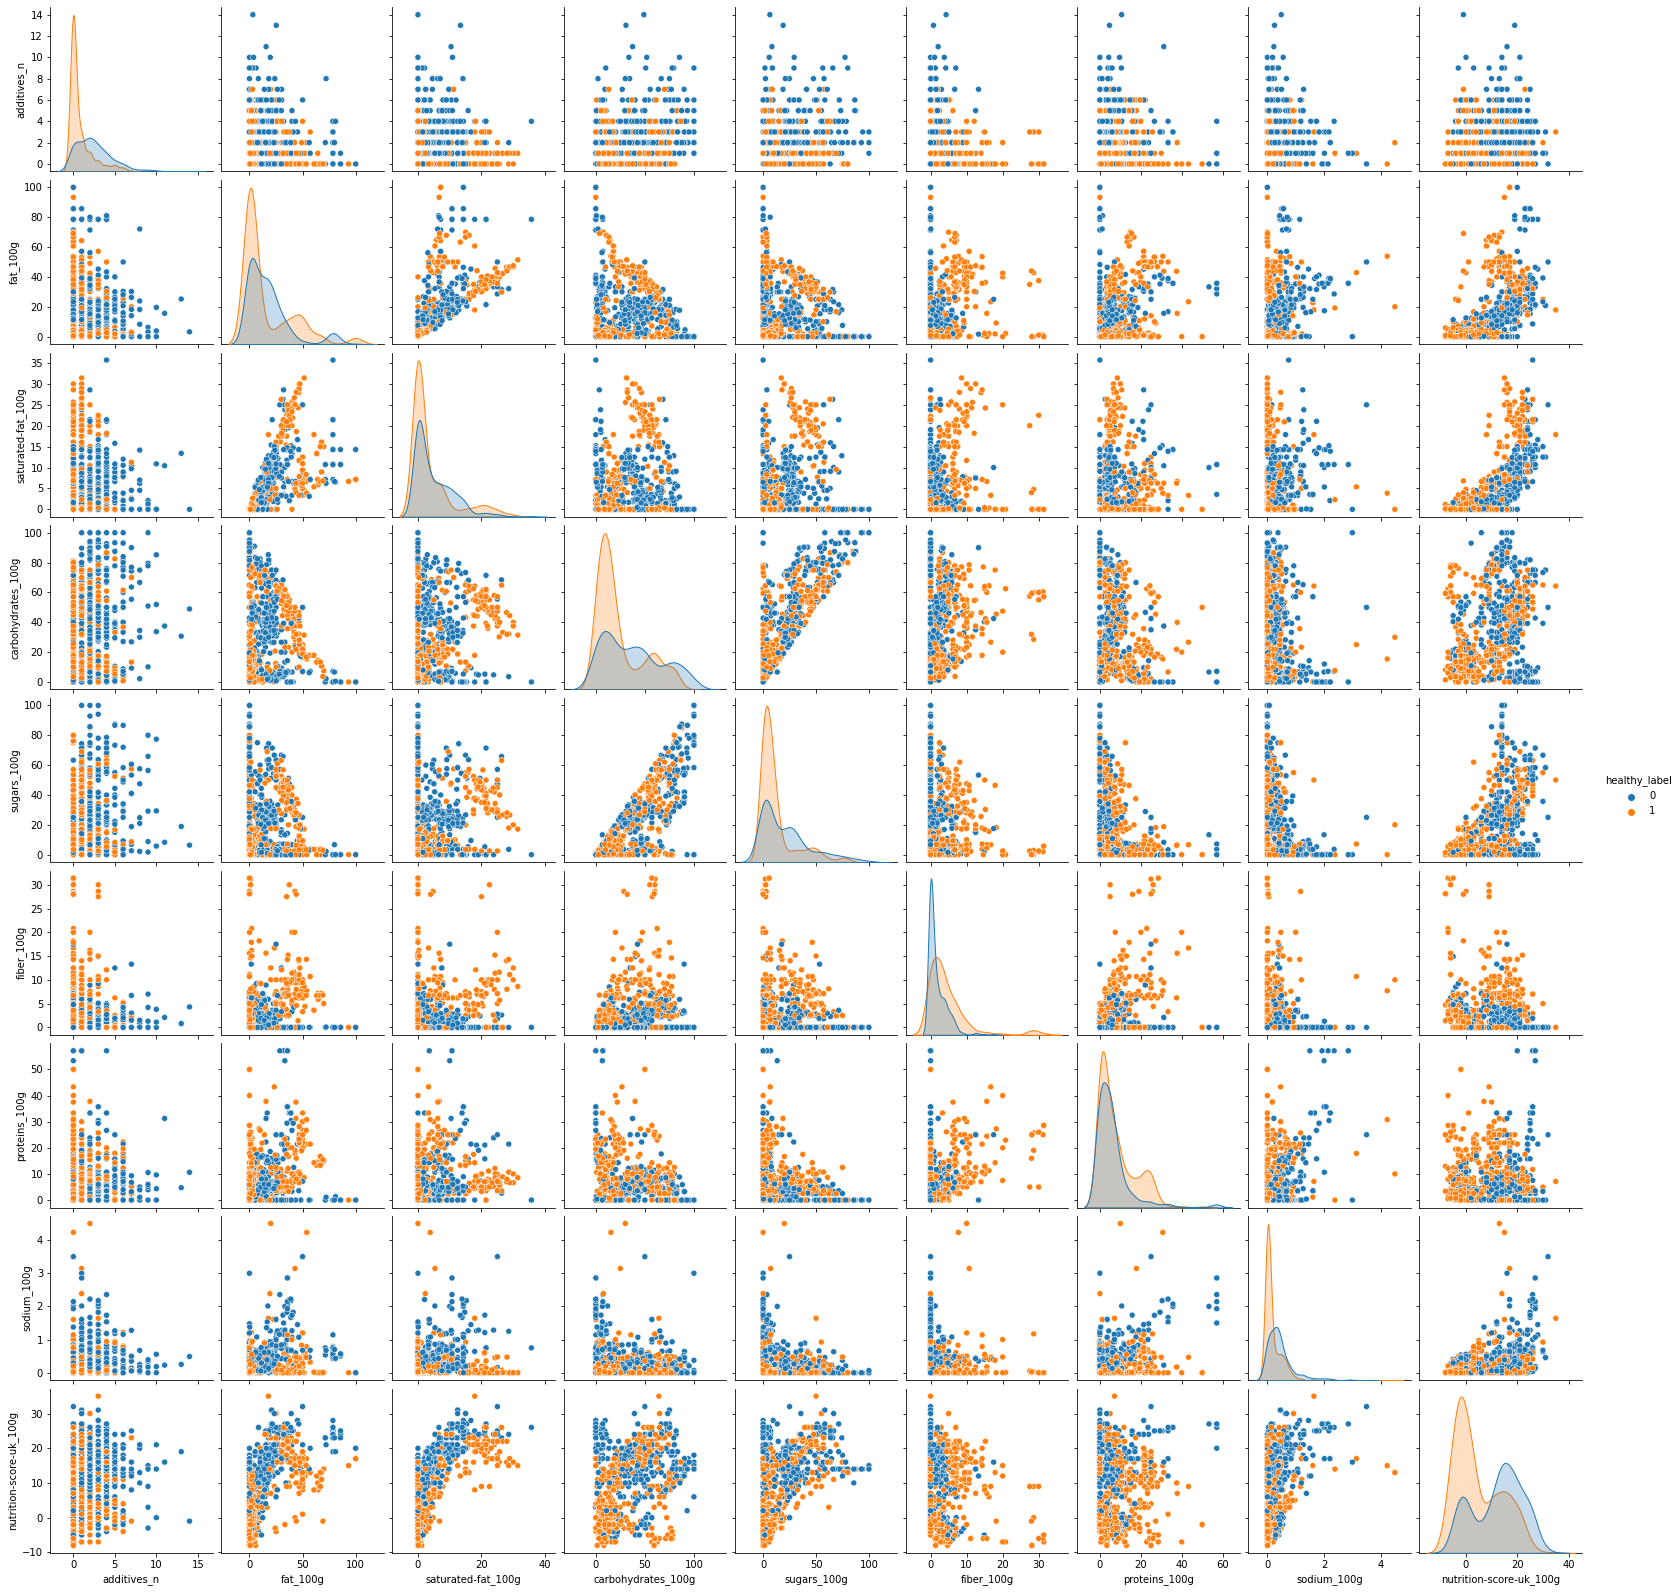

In [36]:
sns.pairplot(training_data, hue="healthy_label")

This looks useable. Fat and saturated fat are correlated, but I need to keep both to account for the different kinds of fat. The same is true for carbs and sugar content. I think I have my final training dataset. I'll save it to load in the classifier script.

In [37]:
training_data.to_csv('training_data.csv', index=False)